In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_stderr').hide();
 } else {
 $('div.input').show();
 $('div.output_stderr').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action='javascript:code_toggle()'><input STYLE='color: #4286f4' type='submit' value='Click here to toggle on/off the raw code.'></form>''')

## Gamma Band (30 - 125 Hz)

### Power

#### All Animals

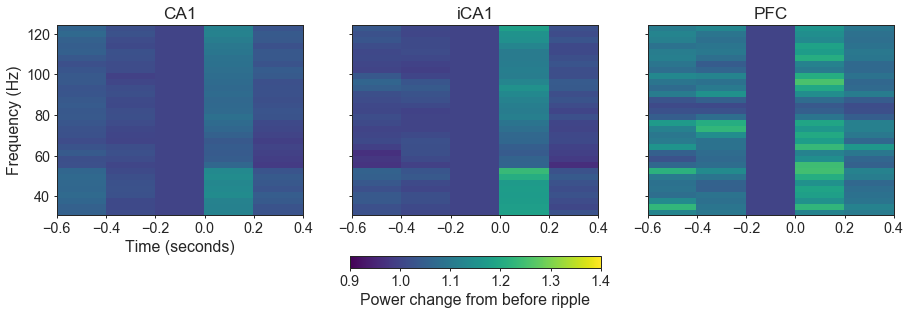

In [164]:
from src.spectral import plot_spectrogram

def plot_power(animal, multitaper_parameter_name):
    gamma_power = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/power/all_ripples/ripple_difference_from_baseline'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name))

    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    brain_areas_of_interest = ['CA1', 'iCA1', 'PFC']
    for area_ind, brain_area in enumerate(brain_areas_of_interest):
        mesh = plot_spectrogram(gamma_power[brain_area], spectrum_name='power_spectrum',
                                axis_handle=ax[area_ind], vmin=0.9, vmax=1.4)
        ax[area_ind].set_title(brain_area)

    ax[0].set_xlabel('Time (seconds)')
    ax[0].set_ylabel('Frequency (Hz)')
    plt.colorbar(mesh, ax=ax.ravel().tolist(),
                 label='Power change from before ripple',
                 orientation='horizontal',
                 shrink=0.3);
    
plot_power('all_animals', 'gamma_frequencies_5Hz_Res')

#### Each Animal

##### HPa

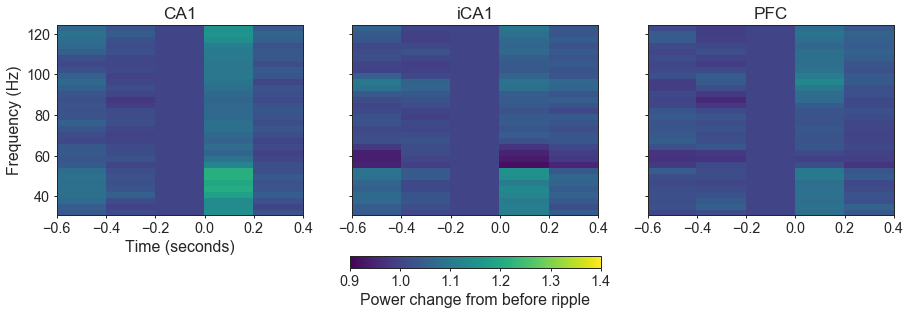

In [165]:
plot_power('HPa', 'gamma_frequencies_5Hz_Res')

##### HPb

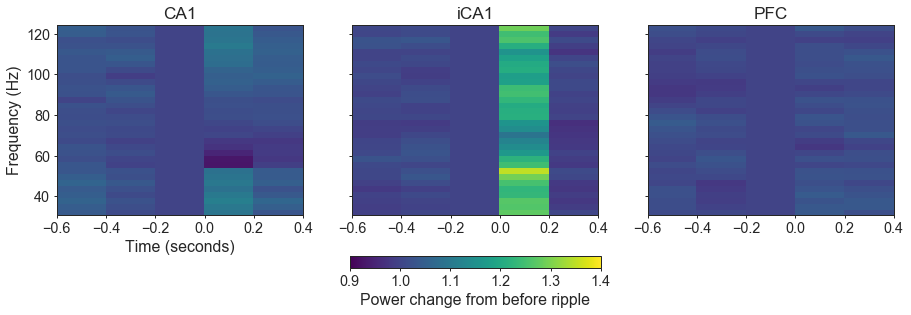

In [166]:
plot_power('HPb', 'gamma_frequencies_5Hz_Res')

##### HPc

In [152]:
plot_power('HPc', 'gamma_frequencies_10Hz_Res')

KeyError: 'No object named /HPc/gamma_frequencies_10Hz_Res/power/all_ripples/ripple_difference_from_baseline in the file'

### Coherence

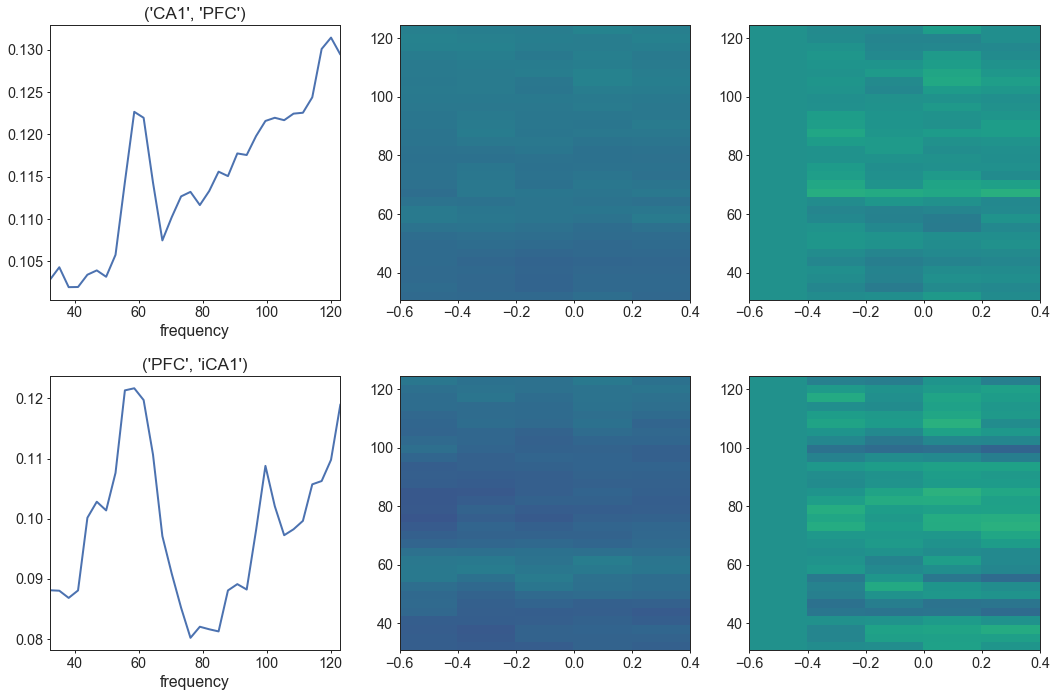

In [167]:
from src.spectral import plot_coherogram

def plot_coherence(animal, multitaper_parameter_name):
    coherence_change = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/coherence/all_ripples/ripple_difference_from_baseline'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name))
    coherence_baseline = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/coherence/all_ripples/baseline'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name))
    coherence_raw = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/coherence/all_ripples/ripple_locked'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name))

    brain_area_pairs_of_interest = [('CA1', 'PFC'), ('PFC', 'iCA1')]

    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    for pair_ind, brain_area_pair in enumerate(brain_area_pairs_of_interest):
        coherence_baseline[brain_area_pair].coherence_magnitude.plot(ax=ax[pair_ind, 0])
        plot_coherogram(coherence_raw[brain_area_pair], axis_handle=ax[pair_ind, 1], vmin=0.0, vmax=0.3)
        plot_coherogram(coherence_change[brain_area_pair], axis_handle=ax[pair_ind, 2], vmin=-0.05, vmax=0.05)
        ax[pair_ind, 0].set_title(brain_area_pair)

    plt.tight_layout()
    
plot_coherence('all_animals', 'gamma_frequencies_5Hz_Res')

KeyError: ('PFC', 'iCA1')

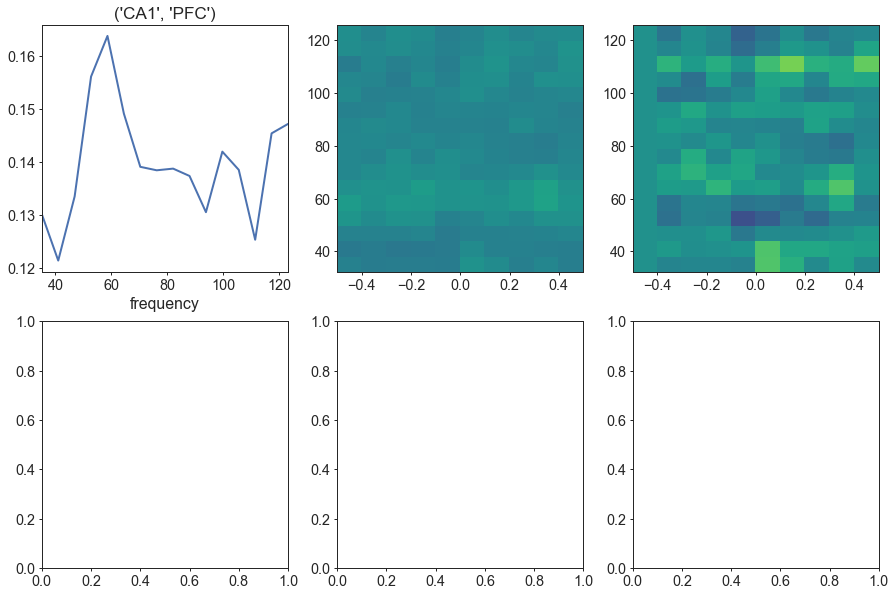

In [115]:
plot_coherence('HPa', 'gamma_frequencies_10Hz_Res')

In [116]:
plot_coherence('HPc', 'gamma_frequencies_10Hz_Res')

KeyError: 'No object named /HPc/gamma_frequencies_10Hz_Res/coherence/all_ripples/ripple_difference_from_baseline in the file'

## Canonical Coherence

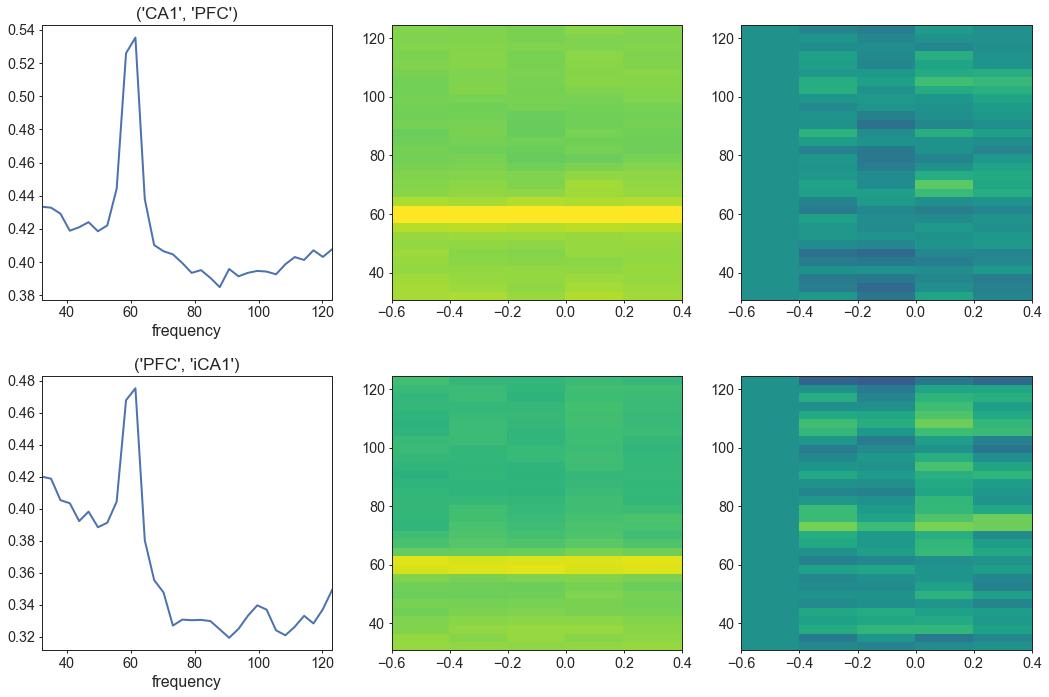

In [168]:
def plot_canonical_coherence(animal, multitaper_parameter_name):
    coherence_change = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/canonical_coherence/all_ripples/ripple_difference_from_baseline'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name))
    coherence_baseline = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/canonical_coherence/all_ripples/baseline'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name))
    coherence_raw = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/canonical_coherence/all_ripples/ripple_locked'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name))

    brain_area_pairs_of_interest = [('CA1', 'PFC'), ('PFC', 'iCA1')]

    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    for pair_ind, brain_area_pair in enumerate(brain_area_pairs_of_interest):
        coherence_baseline[brain_area_pair].coherence_magnitude.plot(ax=ax[pair_ind, 0])
        plot_coherogram(coherence_raw[brain_area_pair], axis_handle=ax[pair_ind, 1], vmin=0.0, vmax=0.5)
        plot_coherogram(coherence_change[brain_area_pair], axis_handle=ax[pair_ind, 2], vmin=-0.05, vmax=0.05)
        ax[pair_ind, 0].set_title(brain_area_pair)

    plt.tight_layout()
    
plot_canonical_coherence('all_animals', 'gamma_frequencies_5Hz_Res')

## Group Delay

### Slow Gamma (30-60 Hz)

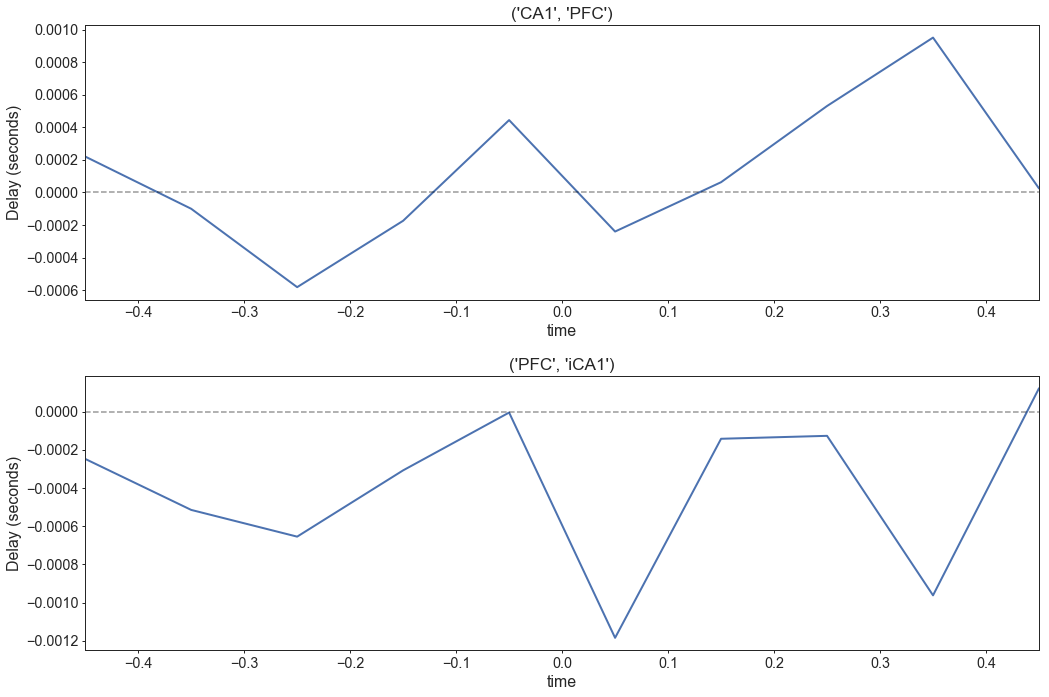

In [146]:
def plot_group_delay(animal, multitaper_parameter_name, frequency_band):
    group_delay = pd.read_hdf(
        '../scripts/results.h5',
        key='/{animal}/{multitaper_parameter_name}/group_delay/all_ripples/ripple_locked/{frequency_band}'.format(
            animal=animal,
            multitaper_parameter_name=multitaper_parameter_name,
            frequency_band=frequency_band))

    brain_area_pairs_of_interest = [('CA1', 'PFC'), ('PFC', 'iCA1')]

    fig, ax = plt.subplots(2, 1, figsize=(15, 10))

    for pair_ind, brain_area_pair in enumerate(brain_area_pairs_of_interest):
        group_delay[brain_area_pair].delay.plot(ax=ax[pair_ind])
        ax[pair_ind].set_title(brain_area_pair)
        ax[pair_ind].axhline(0, color='black', linestyle='--', alpha=0.3)
        ax[pair_ind].set_ylabel('Delay (seconds)')

    plt.tight_layout()
    
plot_group_delay('all_animals', 'gamma_frequencies_10Hz_Res', 'slow_gamma')

### Mid-Gamma (60-100 Hz)

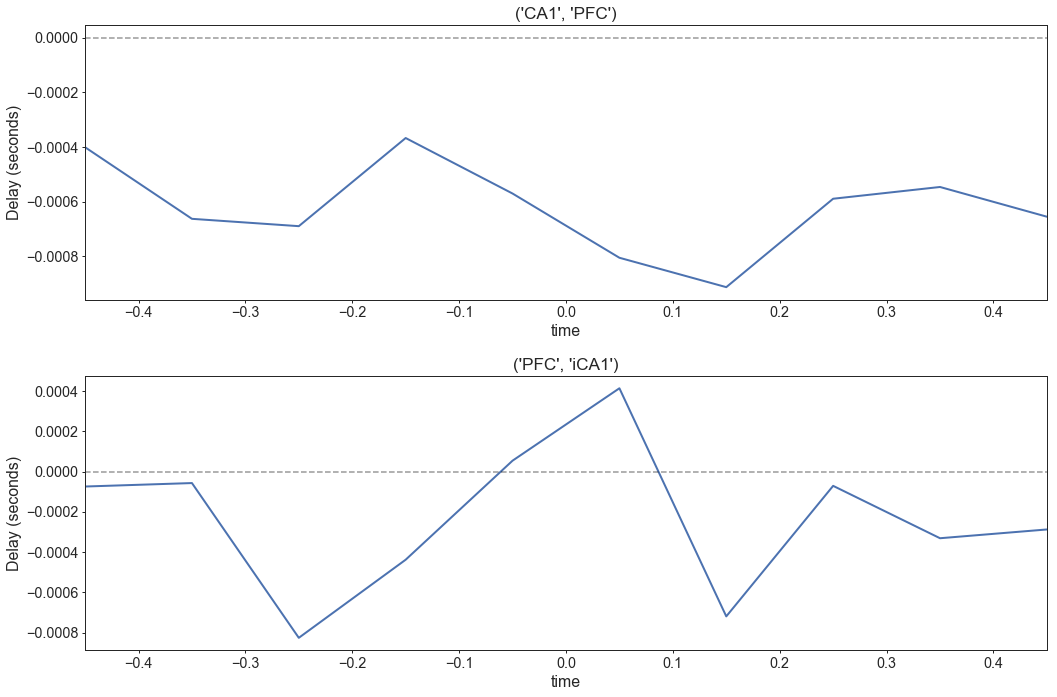

In [147]:
plot_group_delay('all_animals', 'gamma_frequencies_10Hz_Res', 'mid_gamma')

### Fast Gamma (100-125 Hz)

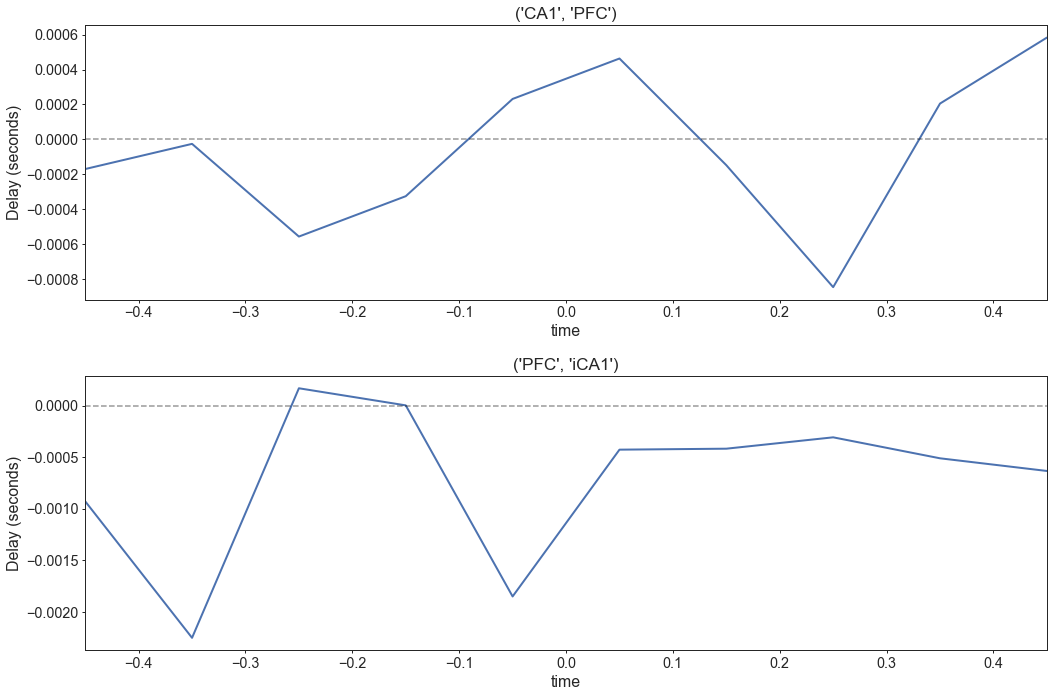

In [148]:
plot_group_delay('all_animals', 'gamma_frequencies_10Hz_Res', 'fast_gamma')

## Beta Band

### Power

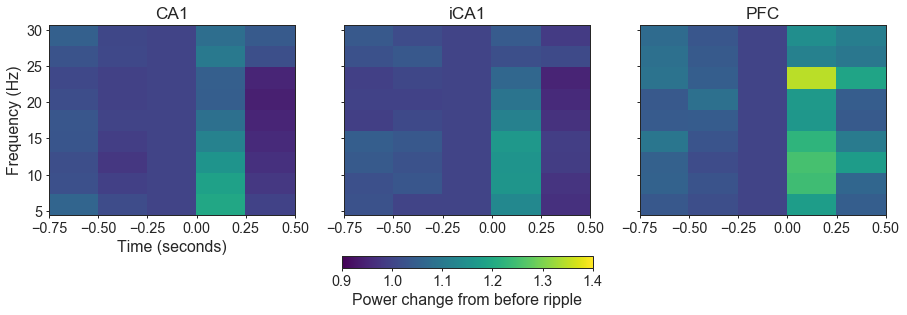

In [153]:
plot_power('all_animals', 'low_frequencies_4Hz_Res')

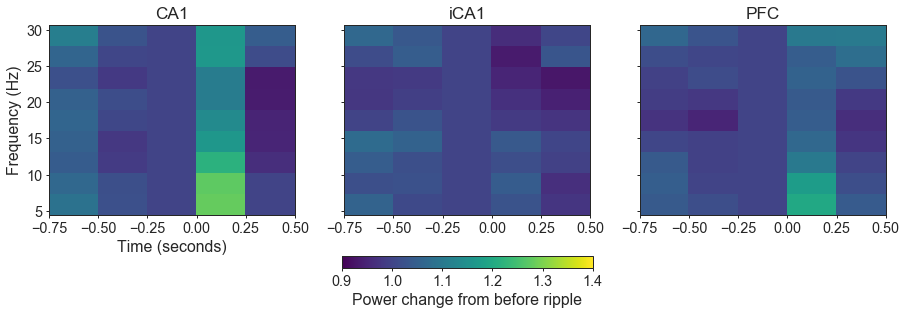

In [154]:
plot_power('HPa', 'low_frequencies_4Hz_Res')

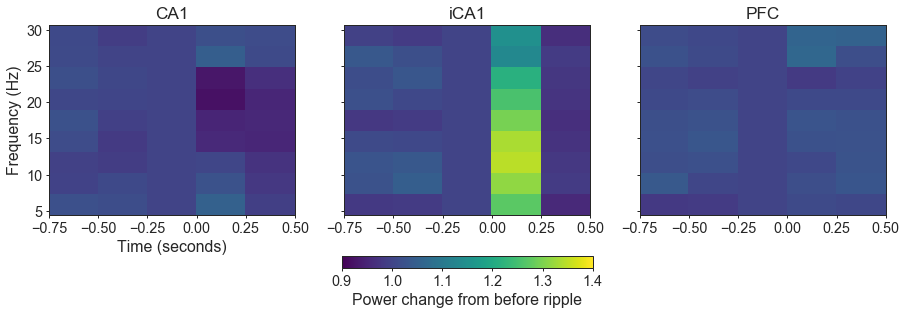

In [155]:
plot_power('HPb', 'low_frequencies_4Hz_Res')

In [156]:
plot_power('HPc', 'low_frequencies_4Hz_Res')

KeyError: 'No object named /HPc/low_frequencies_4Hz_Res/power/all_ripples/ripple_difference_from_baseline in the file'

## Coherence

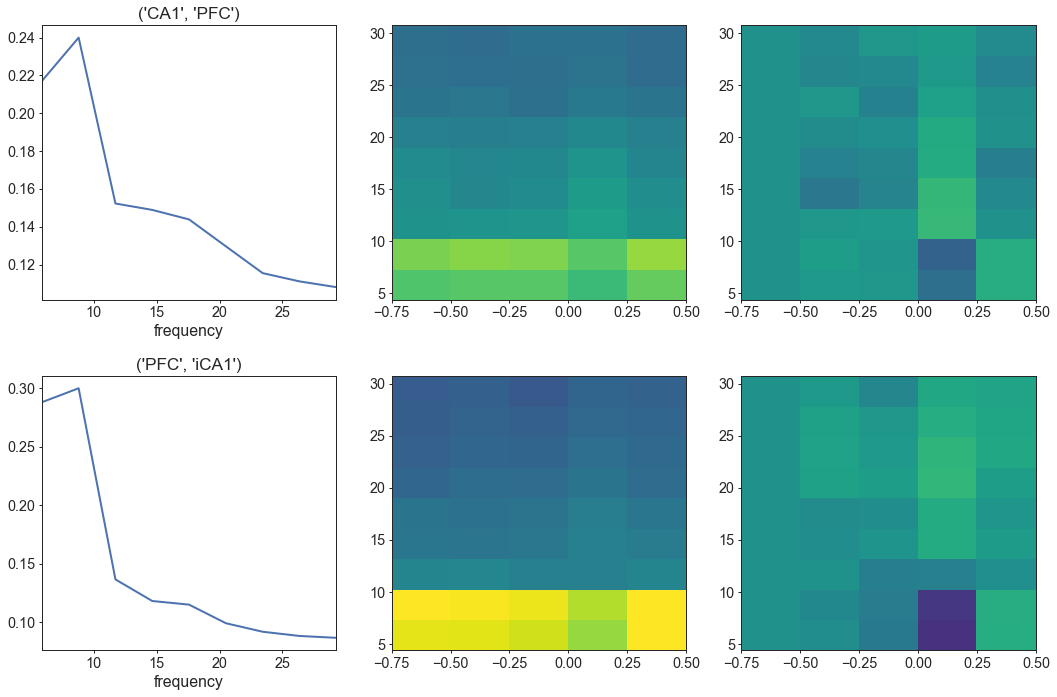

In [157]:
plot_coherence('all_animals', 'low_frequencies_4Hz_Res')

## Canonical Coherence

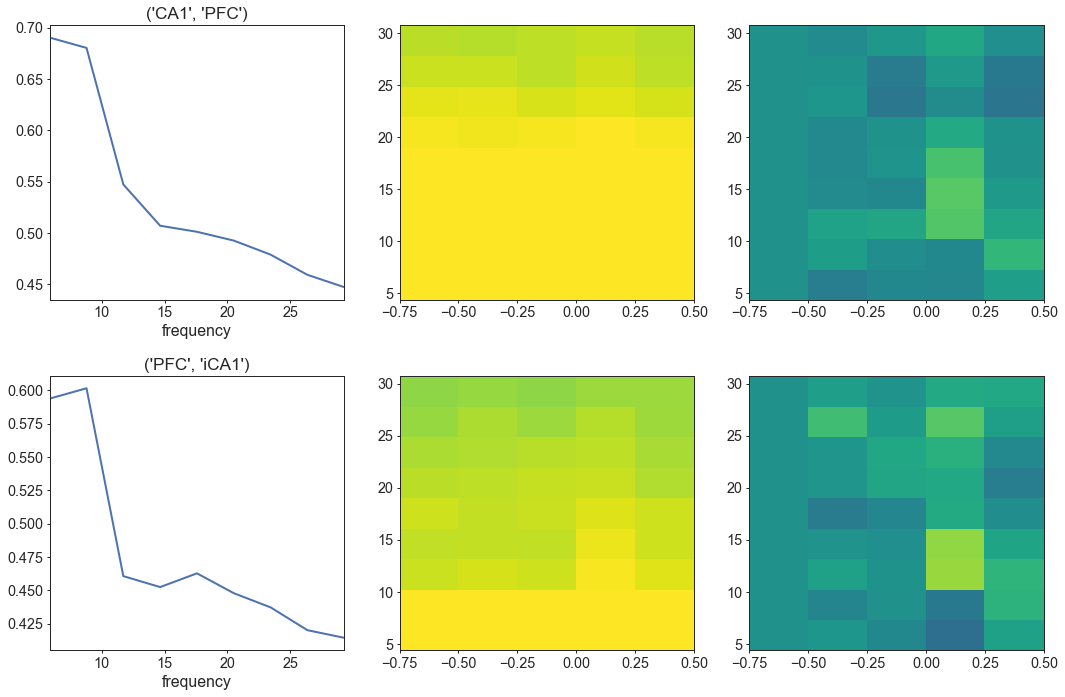

In [159]:
plot_canonical_coherence('all_animals', 'low_frequencies_4Hz_Res')

## Group Delay

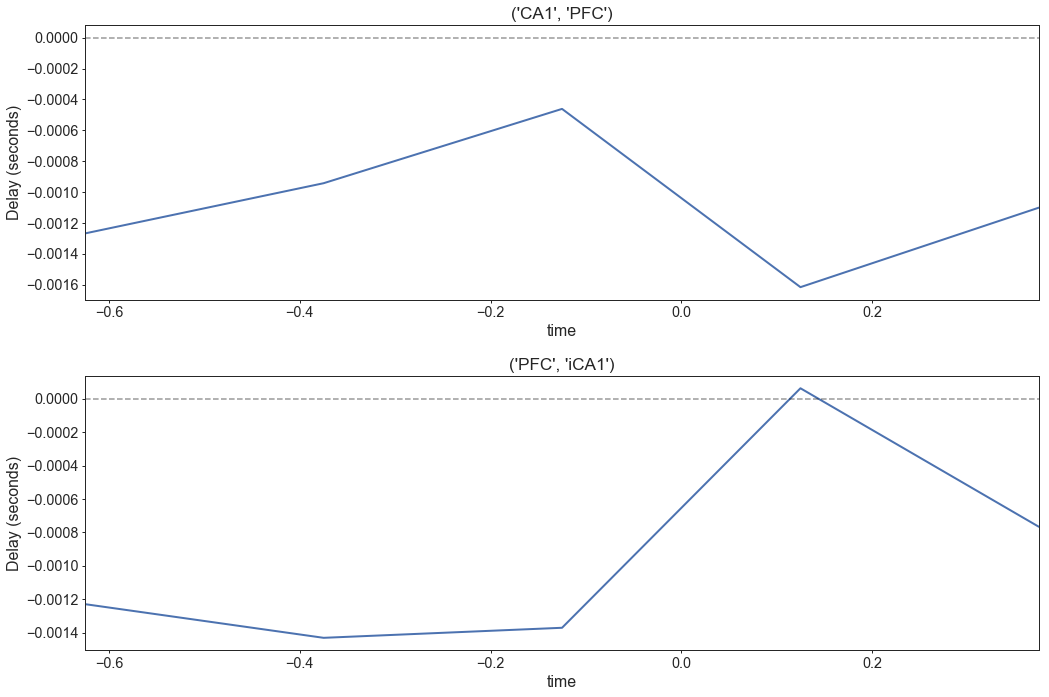

In [158]:
plot_group_delay('all_animals', 'low_frequencies_4Hz_Res', 'beta')

## Ripple Band

### Power

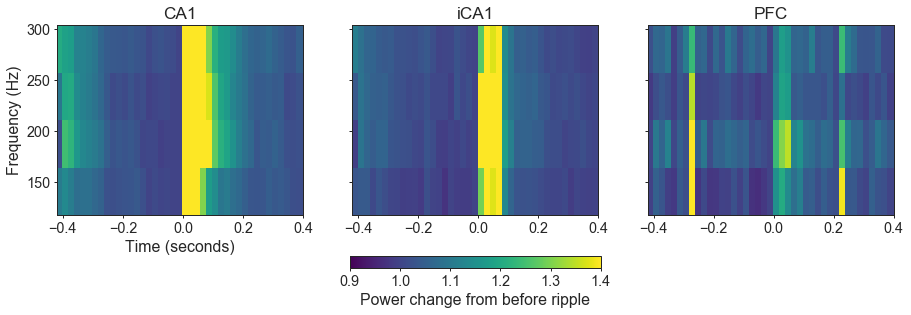

In [160]:
plot_power('all_animals', 'ripple_frequencies_50Hz_Res')

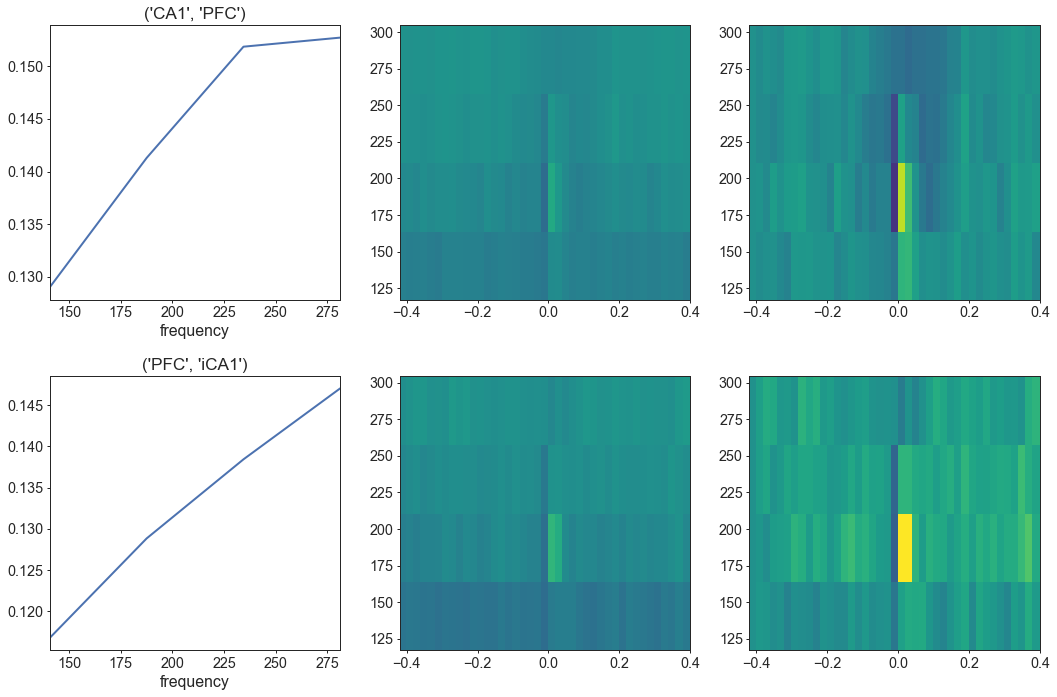

In [161]:
plot_coherence('all_animals', 'ripple_frequencies_50Hz_Res')

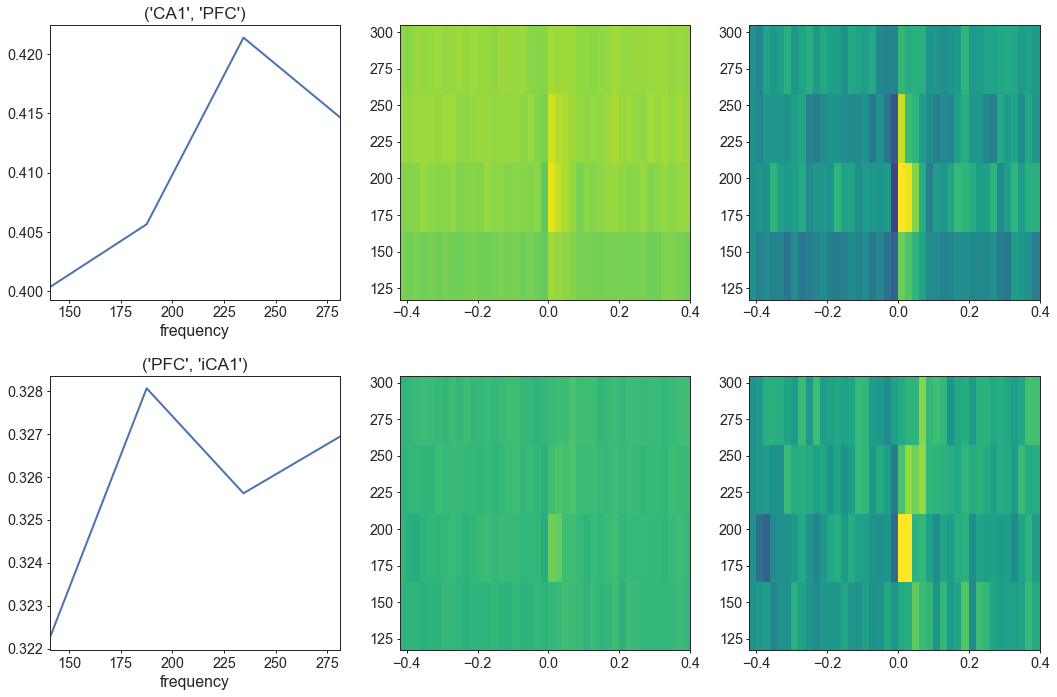

In [162]:
plot_canonical_coherence('all_animals', 'ripple_frequencies_50Hz_Res')

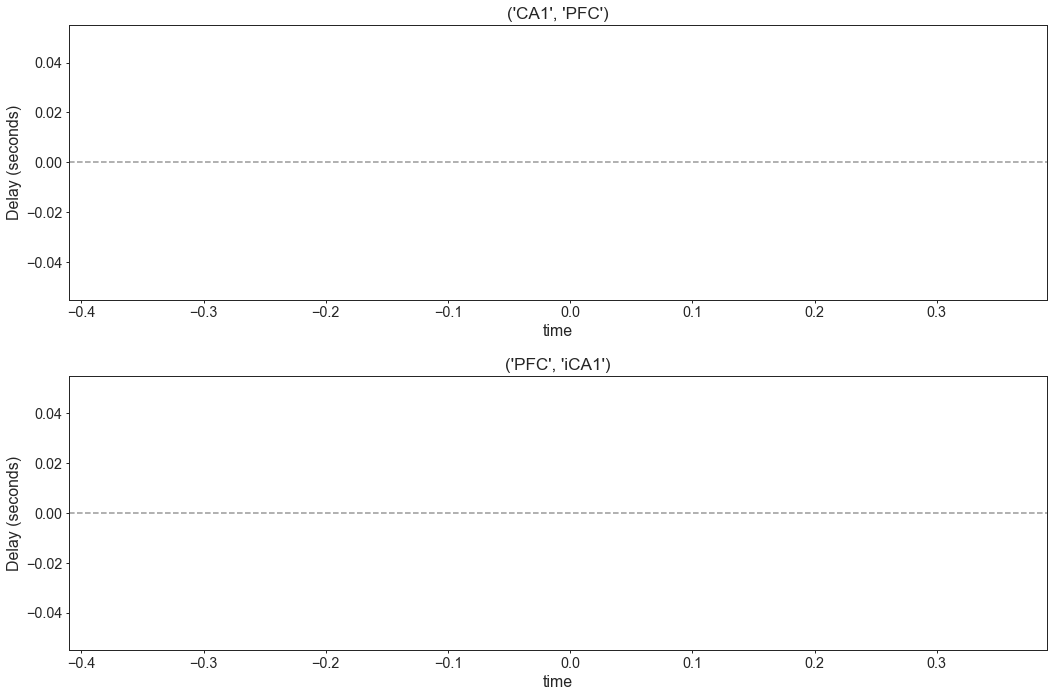

In [163]:
plot_group_delay('all_animals', 'ripple_frequencies_50Hz_Res', 'ripple')